# ...

...<br>

Author(s): *Martin Fränzl*

## Required Packages

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../')
#from trackerlab import readers, detectors

#import importlib
#importlib.reload(trackerlab)

In [2]:
from trackerlab import readers, detectors, utils

In [12]:
#import trackerlab
#trackerlab.__version__

In [13]:
trackerlab.name

'trackerlab'

In [3]:
import json 
plt.rcParams.update(json.load(open('plotstyle.json')))

In [4]:
utils.analyse_tdms("../test_data/Test_001_movie.tdms")

Properties (Root):
  path: Test
  dimx: 512
  dimy: 512
  dimz: 434
  binning: 1
  exposure: 0.030000
'Image'
  Properties ('Image')
  Image
  px
  py
  pz
  PD
  expAD
  expLV


In [5]:
images, metadata = readers.read_tdms_video("../test_data/Test_001_movie.tdms")

In [6]:
metadata

{'path': 'Test',
 'dimx': 512,
 'dimy': 512,
 'dimz': 434,
 'binning': 1,
 'exposure': 0.03}

In [9]:
doc = readers.read_tdms_video.__doc__.split('\n')
stripped = '\n'.join([line.strip() for line in readers.read_tdms_video.__doc__.split('\n')])
print(stripped)


Read TDMS video file.

Arguments:
file (string): The path to the TDMS file.
Returns:
images (3D array): The image series data.

metadata (pandas DataFrame): A pandas DataFrame with the metadata.



In [8]:
#exposure = metadata["exposure"]
#binning = metadata["binning"]

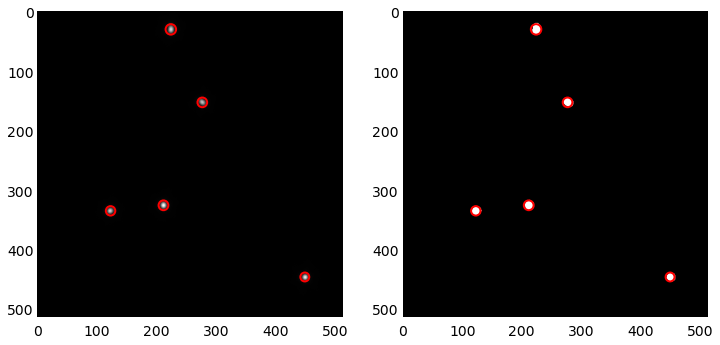

In [10]:
frame = 0
threshold = 1000
min_area = 5
max_area = 250
max_features = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

features, threshold_image = detectors.connected_components(images[frame], threshold, min_area, max_area, max_features)

ax1.imshow(images[frame], cmap='gray')
ax2.imshow(threshold_image, cmap='gray')

for idx, f in features.iterrows():
    ax1.add_patch(plt.Circle((f['x'], f['y']), np.sqrt(f['area']/np.pi), fill=False, ec='r', lw=2))
    ax2.add_patch(plt.Circle((f['x'], f['y']), np.sqrt(f['area']/np.pi), fill=False, ec='r', lw=2))


In [ ]:
frame = 0
threshold = 0.1
max_sigma = 5

fig, ax = plt.subplots(1, 1, figsize=(6,5.6))

ax.imshow(images[frame], cmap='gray')
features, _ = detectors.difference_of_gaussians(images[frame], max_sigma=max_sigma, threshold=threshold)

for idx, f in features.iterrows():
    ax.add_patch(plt.Circle((f['x'], f['y']), np.sqrt(f['area']/np.pi), fill=False, ec='r', lw=2))

In [ ]:
images, metadata = readers.read_tdms_video("../sample_data/Test_005_movie.tdms")

In [ ]:
frame = 0

sigma = 3
low_threshold = 0.2
high_threshold = 0.8
min_radius = 20
max_radius = 30
threshold = 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax.imshow(images[frame], cmap='gray')
features, edges_image = detectors.hough_transform(images[frame], sigma, low_threshold, high_threshold, min_radius, max_radius, threshold)

ax1.imshow(images[frame], cmap='gray')
ax2.imshow(edges_image, cmap='gray')

for idx, f in features.iterrows():
    ax1.add_patch(plt.Circle((f['x'], f['y']), f['radius'], fill=False, ec='r', lw=2))